# Projeto 1 - Base de Dados Covid

O objetivo do projeto será desenvolver um estudo no dataset `COVID.csv`, base esta que contém informações sobre casos de COVID. Ou seja a partir do diagnóstico de sintomas e informações dos pacientes deve-se desenvolver um modelo para prever casos confirmados de COVID'.

<br>

A descrição das variáveis contidas no dataset pode ser encontradas a seguir:

 - **id**: Identificação do paciente<br>
 - **sex**: Sexo do Paciente (0 - Homem / 1 - Mulher) <br>
 - **patient_type**: Se o paciente foi dispensado para casa (1) ou se foi internado (0) <br>
 - **intubed**: Seo paciente foi intubado ou não<br>
 - **pneumonia**: Se o paciente apresentou pneumonia ou não<br>
 - **age**: Idade do Paciente<br>
 - **pregnancy**: Se a paciente estava grávida ou não (para pacientes mulheres)<br>
 - **diabetes**: Se o paciente tem diabetes ou não<br>
 - **copd**: Se opaciente tem COPD ou não<br>
 - **asthma**: Se o paciente tem Asma ou não<br>
 - **inmsupr**: Se o paciente apresentou Imunosupressão ou não<br>
 - **hypertension**: Se o paciente tem hipertensão ou não<br>
 - **ohter_disease**: Se o paciente tem outras doenças ou não<br>
 - **cardiovascular**: Se o paciente tem doenças cardiácas ou não<br>
 - **obesity**: Se o paciente tem obesidade ou não<br>
 - **renal_chronic**: Se o paciente tem problemas renais ou não<br>
 - **tobacco**: Se o paciente é fumante ou não<br>
 - **contact_other_covid**: Se o paciente teve contato com outras pessoas diagnosticadas com covid<br>
 - **icu**: Se o paciente precisou ser internado na UTI<br>
 - **covid_res**: Se o resultado do teste foi Positivo ou Negativo<br>
 
Para ajudar no desenvolvimento do projeto, vamos separar o projeto em algumas seções, conforme descritas a seguir:

- __Preparação dos Dados e Verificação de Consistência__: Neste tópico deve ser feita a verificação da consistência dos dados e caso necessário efetuar eventuais modificações na base de dados. Alguns dos procedimentos que podemos fazer aqui são: Remoção e/ou tratamento de valores faltantes, remoção de duplicatas, ajustes dos tipos de variáveis, análise de _outliers_ entre outras;

<br>

- __Análise Exploratória dos Dados__: Para fazermos a modelagem, precisamos conhecer muito bem os dados que estamos trabalhando. Por isso, nesta parte do projeto foi desenvolvida análises e gráficos a respeito dos dados que estão utilizando;

<br>

- __Modelagem dos Dados__: Nesta parte, foi modelado um classificador para os resultados dos exames de COVID (`covid_res`). Foram treinados alguns modelo e de acordo com alguma métrica de avaliação, decidi qual será o melhor modelo a ser utilizado;

<br>

- __Otimização do Modelo__: A partir do modelo escolhido no tópico anterior, vamos tentar aprimorar e garantir um melhor desempenho no modelo, seja fazendo validação cruzada, otimização de parâmetros com _GridSearchCV_ ou _RandomizedSearchCV_ e até mesmo testar diferentes _thresholds_ (ao invés de utilizar a função _predict_ do modelo, utilize a função _predict_proba_ do modelo e a partir das probabilidades determinar qual vai ser o limiar onde será considerado um caso positivo ou negativo);

<br>

- __Conclusões sobre o Projeto__: Para finalizar, descreve-se conclusões sobre o desenvolvimento do modelo e os resultados obtidos.

## Table of Contents:
* [Preparação dos Dados](#first-bullet)
* [Análise Exploratória dos Dados](#second-bullet)
* [Modelagem dos Dados](#third-bullet)
* [Otimização do Modelo](#fourth-bullet)
* [Conclusões](#fifth-bullet)

## Preparação dos Dados <a class="anchor" id="first-bullet"></a>

#### Imports <a class="anchor" id="imports"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split


#### Carregando o dataset e análises preliminares

In [2]:
covid = pd.read_csv('COVID.csv', index_col=0)
covid.head()

,sex,patient_type,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,0,1,NaN,0.0,27,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,NaN
1,0,1,NaN,0.0,24,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1,NaN
2,1,0,0.0,0.0,54,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN,1,0.0
3,0,0,0.0,1.0,30,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1,0.0
4,1,0,0.0,0.0,60,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,NaN,1,0.0


In [3]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 499692 entries, 0 to 499691
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   sex                  499692 non-null  int64  
 1   patient_type         499692 non-null  int64  
 2   intubed              107424 non-null  float64
 3   pneumonia            499681 non-null  float64
 4   age                  499692 non-null  int64  
 5   pregnancy            245258 non-null  float64
 6   diabetes             498051 non-null  float64
 7   copd                 498246 non-null  float64
 8   asthma               498250 non-null  float64
 9   inmsupr              498030 non-null  float64
 10  hypertension         498203 non-null  float64
 11  other_disease        497499 non-null  float64
 12  cardiovascular       498183 non-null  float64
 13  obesity              498222 non-null  float64
 14  renal_chronic        498216 non-null  float64
 15  tobacco          

In [4]:
covid.describe()

,sex,patient_type,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
count,499692.000000,499692.000000,107424.000000,499681.000000,499692.000000,245258.000000,498051.000000,498246.000000,498250.000000,498030.000000,498203.000000,497499.000000,498183.000000,498222.000000,498216.000000,498113.000000,346017.000000,499692.000000,107423.000000
mean,0.493492,0.784775,0.084739,0.157533,42.545942,0.014736,0.125186,0.016610,0.032542,0.016206,0.163267,0.030939,0.022921,0.164443,0.020110,0.086235,0.569238,0.441586,0.083865
std,0.499958,0.410978,0.278494,0.364302,16.640391,0.120492,0.330930,0.127806,0.177434,0.126267,0.369609,0.173152,0.149653,0.370677,0.140376,0.280712,0.495184,0.496577,0.277186
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,120.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Tratamento dos valores nulos

In [5]:
covid.isna().sum()

sex                         0
patient_type                0
intubed                392268
pneumonia                  11
age                         0
pregnancy              254434
diabetes                 1641
copd                     1446
asthma                   1442
inmsupr                  1662
hypertension             1489
other_disease            2193
cardiovascular           1509
obesity                  1470
renal_chronic            1476
tobacco                  1579
contact_other_covid    153675
covid_res                   0
icu                    392269
dtype: int64

Podemos ver que há muitos valores nulos para diversas features. Desde já podemos ajustar como '0' o valor de 'pregnancy' para os homens, a fim de diminuir estes valores nulos:

In [6]:
covid['pregnancy'].value_counts()

0.0    241644
1.0      3614
Name: pregnancy, dtype: int64

In [7]:
covid.loc[covid.sex == 0, "pregnancy"] = 0

In [8]:
covid['pregnancy'].value_counts()

0.0    494742
1.0      3614
Name: pregnancy, dtype: int64

---

Outras relações que podemos tirar para tentar diminuir os valores nulos são a de pacientes que foram para casa *versus* os que foram internados e entubados:

In [9]:
covid[covid['patient_type']==1]['intubed'].value_counts(dropna=False)

NaN    392146
Name: intubed, dtype: int64

In [10]:
covid[covid['patient_type']==1]['icu'].value_counts(dropna=False)

NaN    392146
Name: icu, dtype: int64

In [11]:
covid[covid['intubed']==1]['icu'].value_counts(dropna=False)

0.0    4601
1.0    4502
Name: icu, dtype: int64

In [12]:
# pacientes que foram para casa não foram entubados
covid.loc[covid.patient_type == 1, "intubed"] = 0

# pacientes que foram para casa não foram internados
covid.loc[covid.patient_type == 1, "icu"] = 0

# pacientes que foram entubados foram internados
covid.loc[covid.intubed == 1, "icu"] = 1

In [13]:
covid.isna().sum()

sex                         0
patient_type                0
intubed                   122
pneumonia                  11
age                         0
pregnancy                1336
diabetes                 1641
copd                     1446
asthma                   1442
inmsupr                  1662
hypertension             1489
other_disease            2193
cardiovascular           1509
obesity                  1470
renal_chronic            1476
tobacco                  1579
contact_other_covid    153675
covid_res                   0
icu                       123
dtype: int64

---

In [14]:
covid['contact_other_covid'].value_counts()

1.0    196966
0.0    149051
Name: contact_other_covid, dtype: int64

Neste momento já reduzimos significativamente a quantidade de nulos, com exceção da coluna de "teve contato com outras pessoas com diagnóstico positivo". Iremos utilizar duas abordagens a partir de agora:
- Testar o modelo SEM levar em conta essa coluna
- Testar o modelo com zero no lugar dos valores nulos

In [15]:
covid_alt = covid.drop(['contact_other_covid'], axis = 1)
covid['contact_other_covid'].fillna(0, inplace=True)

In [16]:
covid.isna().sum()

sex                       0
patient_type              0
intubed                 122
pneumonia                11
age                       0
pregnancy              1336
diabetes               1641
copd                   1446
asthma                 1442
inmsupr                1662
hypertension           1489
other_disease          2193
cardiovascular         1509
obesity                1470
renal_chronic          1476
tobacco                1579
contact_other_covid       0
covid_res                 0
icu                     123
dtype: int64

Avaliando qual o prejuízo de se desconsiderar (apagar) o restante das linhas que contêm valores nulos, percebe-se que elas correspondem a 4744 registros (0.94% da base de dados), portanto é razoável fazê-lo:

In [17]:
diff = len(covid)-len(covid.dropna())
print(diff)
diff/len(covid) * 100

4744


0.9493848210497667

In [18]:
covid.dropna(inplace=True)
covid_alt.dropna(inplace=True)

## Análise Exploratória dos Dados <a class="anchor" id="second-bullet"></a>

#### Visualização do target

In [19]:
covid['covid_res'].value_counts()

0    276757
1    218191
Name: covid_res, dtype: int64

A distribuição do nosso target é bem balanceada, o que ajuda na modelagem em geral. Dessa forma, a princípio, não precisaremos utilizar algumas técnicas como estratificação, over e undersampling, SMOTE, etc...

<AxesSubplot:xlabel='covid_res', ylabel='count'>

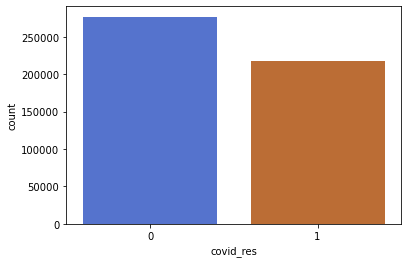

In [20]:
sns.countplot(data=covid, x='covid_res', palette=['#4169E1','#D2691E'])

#### Visualizações gerais

In [ ]:
'''for column in covid.columns.drop('covid_res'):
    fig = px.histogram(covid, x=column, color='covid_res',
                       color_discrete_sequence=['#D2691E','#4169E1'],
                       title=f"Distribuição de {column}")
    fig.show()'''

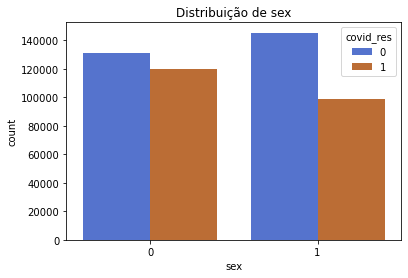

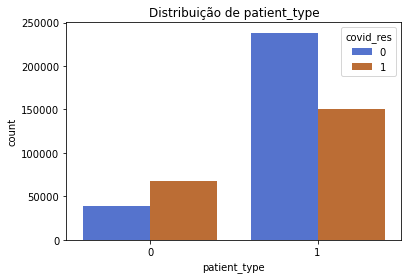

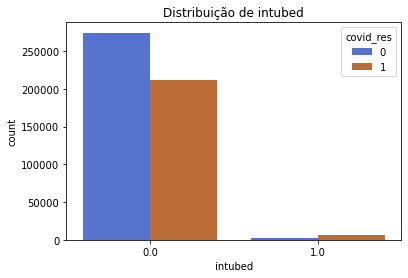

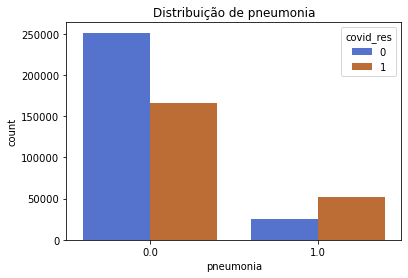

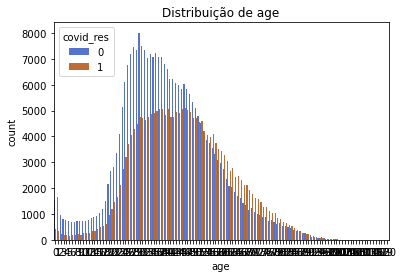

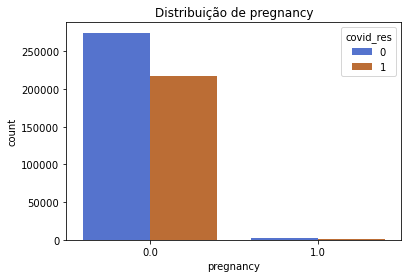

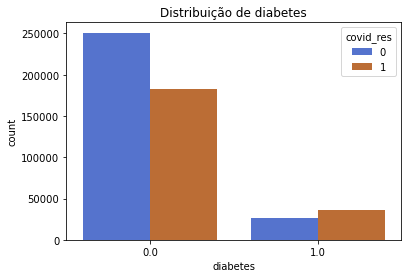

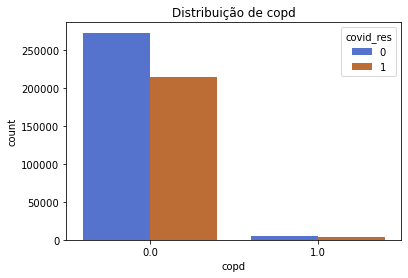

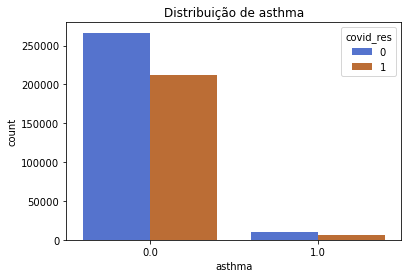

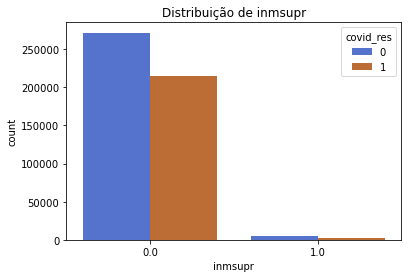

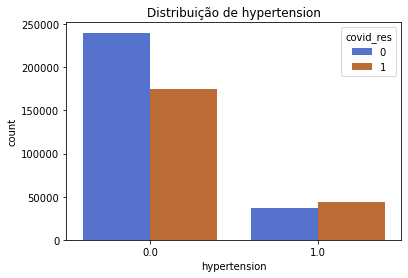

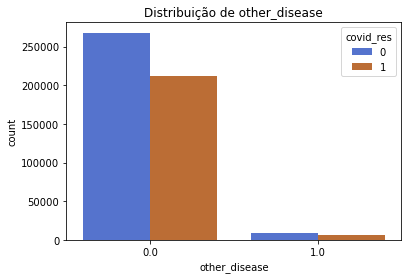

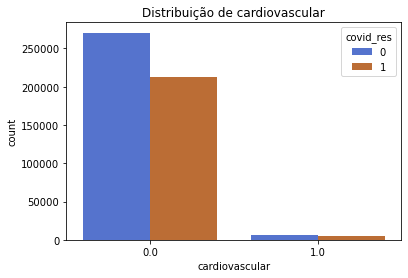

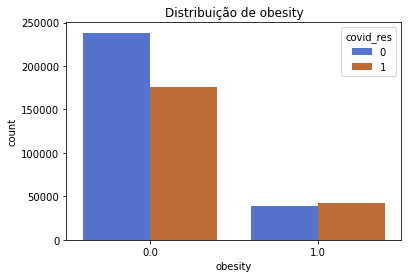

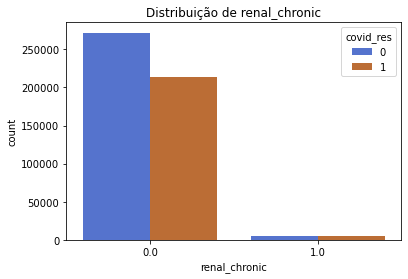

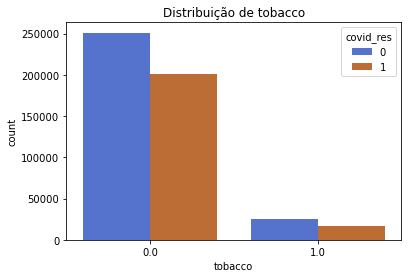

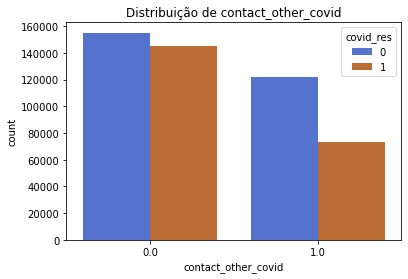

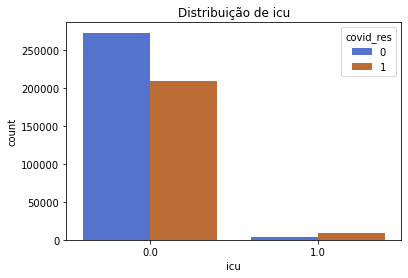

In [44]:
for column in covid.columns.drop('covid_res'):
    sns.countplot(data=covid, x=column, hue='covid_res', palette=['#4169E1','#D2691E']).set_title(f"Distribuição de {column}")
    plt.show()

Podemos ver a partir das *views* que grande maioria dos pacientes:
- Não foi internado ou foi para casa
- Não apresenta fatores de risco ou doenças em geral
- Possuem idade entre 20 e 80 anos, com média de 40 anos

Ademais, a distribuição de diagnósticos de COVID é sempre cerca de 60%~70% dos indivíduos para cada categoria/feature (comprova dados balanceados).

## Modelagem dos Dados <a class="anchor" id="third-bullet"></a>

#### Divisão (split) dos dados

In [23]:
random_state=42

In [24]:
X = covid.drop(columns="covid_res")
y = covid["covid_res"]

X_alt = covid_alt.drop(columns="covid_res")
y_alt = covid_alt["covid_res"]

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=random_state,
                                                    stratify=y)

X_train_alt, X_test_alt, y_train_alt, y_test_alt = train_test_split(X_alt, 
                                                    y_alt, 
                                                    test_size=0.2, 
                                                    random_state=random_state,
                                                    stratify=y_alt)

A princípio, como todas as nossas features são do tipo *binárias*, com exceção da idade, não há necessidade de normalização (*scaling*) dos dados, ou haveria muita pouca diferença nos resultados. Para tirar a prova, testaremos os modelos que tradicionalmente necessitam de *scaling* com esse ajuste e em seguida sem.

#### Escolha dos modelos

Para essa análise, serão testados alguns tipos diferentes de algoritmos de aprendizado de máquina, a fim de avaliarmos qual o que obtém melhor performance e capacidade de generalização (*baseline*), e em seguida será feito o seu *tuning*, para melhoria de resultados e ajustes de hiperparâmetros.

Os modelos a serem testados são os seguintes:
- Random Forest Classifier
- Adaboost
- K-Nearest Neighbors
- Logistic Regression


In [26]:
# imports de modelos
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# imports de metricas e ferramentas de report/visualização
from sklearn.metrics import classification_report
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from prettytable import PrettyTable
from pprint import pprint
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score

#### Random Forest Classifier

Base considerando contato com outros diagnósticos COVID:
              precision    recall  f1-score   support

           0       0.62      0.83      0.71     55352
           1       0.63      0.36      0.46     43638

    accuracy                           0.62     98990
   macro avg       0.63      0.60      0.59     98990
weighted avg       0.63      0.62      0.60     98990



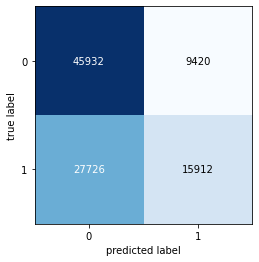

Base desconsiderando contato com outros:
              precision    recall  f1-score   support

           0       0.62      0.84      0.72     55352
           1       0.64      0.35      0.45     43638

    accuracy                           0.63     98990
   macro avg       0.63      0.60      0.58     98990
weighted avg       0.63      0.63      0.60     98990



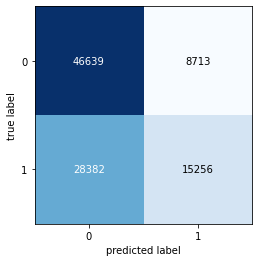

In [27]:
model = RandomForestClassifier(random_state=random_state)

splits = [('Base considerando contato com outros diagnósticos COVID',X_train,y_train,X_test,y_test),('Base desconsiderando contato com outros',X_train_alt,y_train_alt,X_test_alt,y_test_alt)]
for name, X_train_split, y_train_split, X_test_split, y_test_split in splits:
    print(name+':')
    
    model.fit(X_train_split, y_train_split)
    y_pred = model.predict(X_test_split)
    print(classification_report(y_test_split, y_pred))
    
    cm = confusion_matrix(y_test_split, y_pred)
    plot_confusion_matrix(conf_mat=cm)
    plt.show()
    
    print('='*60)

#### AdaBoost

Base considerando contato com outros diagnósticos COVID:
              precision    recall  f1-score   support

           0       0.63      0.85      0.72     55352
           1       0.66      0.37      0.47     43638

    accuracy                           0.64     98990
   macro avg       0.65      0.61      0.60     98990
weighted avg       0.64      0.64      0.61     98990



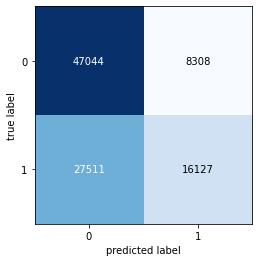

Base desconsiderando contato com outros:
              precision    recall  f1-score   support

           0       0.63      0.86      0.72     55352
           1       0.66      0.36      0.46     43638

    accuracy                           0.64     98990
   macro avg       0.65      0.61      0.59     98990
weighted avg       0.64      0.64      0.61     98990



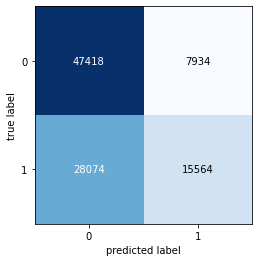

In [28]:
model = AdaBoostClassifier(random_state=random_state)

splits = [('Base considerando contato com outros diagnósticos COVID',X_train,y_train,X_test,y_test),('Base desconsiderando contato com outros',X_train_alt,y_train_alt,X_test_alt,y_test_alt)]
for name, X_train_split, y_train_split, X_test_split, y_test_split in splits:
    print(name+':')
    
    model.fit(X_train_split, y_train_split)
    y_pred = model.predict(X_test_split)
    print(classification_report(y_test_split, y_pred))
    
    cm = confusion_matrix(y_test_split, y_pred)
    plot_confusion_matrix(conf_mat=cm)
    plt.show()
    
    print('='*60)

#### K-Nearest Neighbors

##### Com scaling

Base considerando contato com outros diagnósticos COVID:
              precision    recall  f1-score   support

           0       0.63      0.84      0.72     55352
           1       0.65      0.37      0.47     43638

    accuracy                           0.64     98990
   macro avg       0.64      0.61      0.60     98990
weighted avg       0.64      0.64      0.61     98990



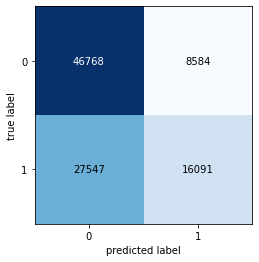

Base desconsiderando contato com outros diagnósticos COVID:
              precision    recall  f1-score   support

           0       0.63      0.85      0.72     55352
           1       0.65      0.36      0.46     43638

    accuracy                           0.63     98990
   macro avg       0.64      0.60      0.59     98990
weighted avg       0.64      0.63      0.61     98990



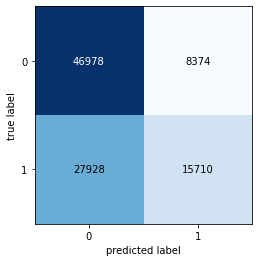

In [29]:
scaler = StandardScaler()
model = LogisticRegression(random_state=random_state)

X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)
X_train_std_alt = scaler.fit_transform(X_train_alt)
X_test_std_alt = scaler.transform(X_test_alt)

splits = [('Base considerando contato com outros diagnósticos COVID',X_train_std,y_train,X_test_std,y_test),('Base desconsiderando contato com outros diagnósticos COVID',X_train_std_alt,y_train_alt,X_test_std_alt,y_test_alt)]
for name, X_train_split, y_train_split, X_test_split, y_test_split in splits:
    print(name+':')
    
    model.fit(X_train_split, y_train_split)
    y_pred = model.predict(X_test_split)
    print(classification_report(y_test_split, y_pred))
    
    cm = confusion_matrix(y_test_split, y_pred)
    plot_confusion_matrix(conf_mat=cm, fontcolor_threshold=0.8)
    plt.show()
    
    print('='*60)

##### Sem scaling

Número de vizinhos (k): 1
Base considerando contato com outros diagnósticos COVID:
              precision    recall  f1-score   support

           0       0.60      0.63      0.61     55352
           1       0.50      0.47      0.48     43638

    accuracy                           0.56     98990
   macro avg       0.55      0.55      0.55     98990
weighted avg       0.55      0.56      0.55     98990



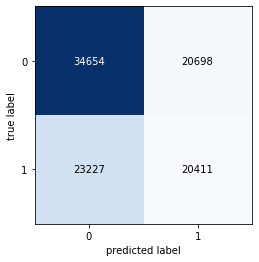

Base desconsiderando contato com outros diagnósticos COVID:
              precision    recall  f1-score   support

           0       0.60      0.62      0.61     55352
           1       0.49      0.47      0.48     43638

    accuracy                           0.55     98990
   macro avg       0.54      0.54      0.54     98990
weighted avg       0.55      0.55      0.55     98990



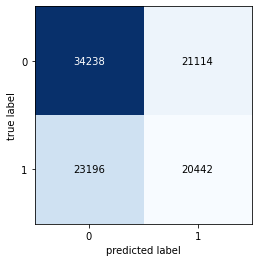

Número de vizinhos (k): 3
Base considerando contato com outros diagnósticos COVID:
              precision    recall  f1-score   support

           0       0.61      0.66      0.63     55352
           1       0.52      0.46      0.49     43638

    accuracy                           0.57     98990
   macro avg       0.56      0.56      0.56     98990
weighted avg       0.57      0.57      0.57     98990



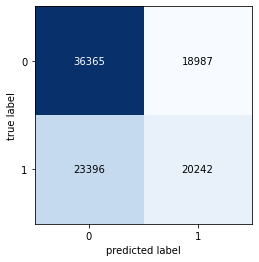

Base desconsiderando contato com outros diagnósticos COVID:
              precision    recall  f1-score   support

           0       0.61      0.68      0.64     55352
           1       0.52      0.44      0.48     43638

    accuracy                           0.57     98990
   macro avg       0.56      0.56      0.56     98990
weighted avg       0.57      0.57      0.57     98990



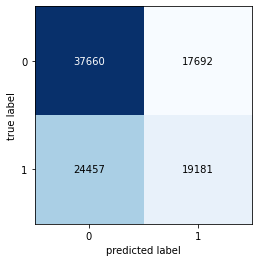

Número de vizinhos (k): 5
Base considerando contato com outros diagnósticos COVID:
              precision    recall  f1-score   support

           0       0.62      0.66      0.64     55352
           1       0.53      0.48      0.50     43638

    accuracy                           0.58     98990
   macro avg       0.57      0.57      0.57     98990
weighted avg       0.58      0.58      0.58     98990



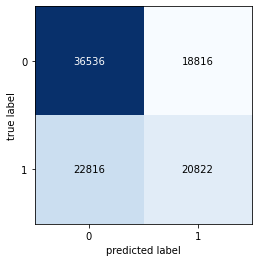

Base desconsiderando contato com outros diagnósticos COVID:
              precision    recall  f1-score   support

           0       0.61      0.64      0.63     55352
           1       0.52      0.49      0.50     43638

    accuracy                           0.57     98990
   macro avg       0.57      0.57      0.57     98990
weighted avg       0.57      0.57      0.57     98990



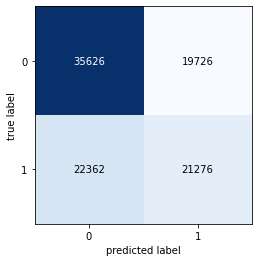

Número de vizinhos (k): 8
Base considerando contato com outros diagnósticos COVID:
              precision    recall  f1-score   support

           0       0.61      0.79      0.69     55352
           1       0.58      0.37      0.45     43638

    accuracy                           0.61     98990
   macro avg       0.60      0.58      0.57     98990
weighted avg       0.60      0.61      0.59     98990



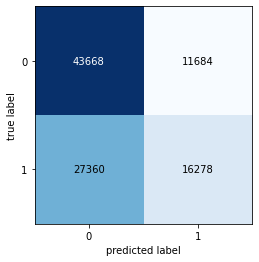

Base desconsiderando contato com outros diagnósticos COVID:
              precision    recall  f1-score   support

           0       0.61      0.79      0.69     55352
           1       0.58      0.37      0.45     43638

    accuracy                           0.60     98990
   macro avg       0.60      0.58      0.57     98990
weighted avg       0.60      0.60      0.59     98990



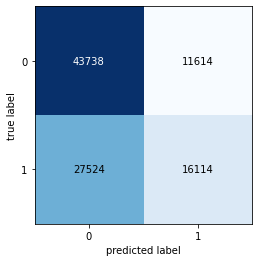

In [30]:
list_k = [1,3,5,8]

for k in list_k:
    print('Número de vizinhos (k):',k)
    model = KNeighborsClassifier(n_neighbors=k)

    splits = [('Base considerando contato com outros diagnósticos COVID',X_train,y_train,X_test,y_test),('Base desconsiderando contato com outros diagnósticos COVID',X_train_alt,y_train_alt,X_test_alt,y_test_alt)]
    for name, X_train_split, y_train_split, X_test_split, y_test_split in splits:
        print(name+':')

        model.fit(X_train_split, y_train_split)
        y_pred = model.predict(X_test_split)
        print(classification_report(y_test_split, y_pred))

        cm = confusion_matrix(y_test_split, y_pred)
        plot_confusion_matrix(conf_mat=cm, fontcolor_threshold=0.8)
        plt.show()

        print('='*60)

#### Regressão Logística

##### Com scaling

Base considerando contato com outros diagnósticos COVID:
              precision    recall  f1-score   support

           0       0.63      0.84      0.72     55352
           1       0.65      0.37      0.47     43638

    accuracy                           0.64     98990
   macro avg       0.64      0.61      0.60     98990
weighted avg       0.64      0.64      0.61     98990



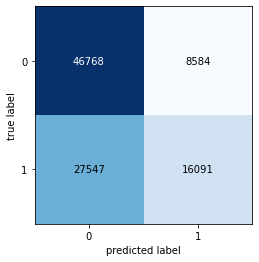

Base desconsiderando contato com outros diagnósticos COVID:
              precision    recall  f1-score   support

           0       0.63      0.85      0.72     55352
           1       0.65      0.36      0.46     43638

    accuracy                           0.63     98990
   macro avg       0.64      0.60      0.59     98990
weighted avg       0.64      0.63      0.61     98990



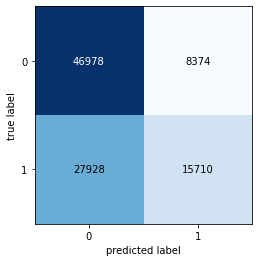

In [31]:
scaler = StandardScaler()
model = LogisticRegression(random_state=random_state)

X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)
X_train_std_alt = scaler.fit_transform(X_train_alt)
X_test_std_alt = scaler.transform(X_test_alt)

splits = [('Base considerando contato com outros diagnósticos COVID',X_train_std,y_train,X_test_std,y_test),('Base desconsiderando contato com outros diagnósticos COVID',X_train_std_alt,y_train_alt,X_test_std_alt,y_test_alt)]
for name, X_train_split, y_train_split, X_test_split, y_test_split in splits:
    print(name+':')
    
    model.fit(X_train_split, y_train_split)
    y_pred = model.predict(X_test_split)
    print(classification_report(y_test_split, y_pred))
    
    cm = confusion_matrix(y_test_split, y_pred)
    plot_confusion_matrix(conf_mat=cm, fontcolor_threshold=0.8)
    plt.show()
    
    print('='*60)

##### Sem scaling

Base considerando contato com outros diagnósticos COVID:


C:\Users\victo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



              precision    recall  f1-score   support

           0       0.63      0.85      0.72     55352
           1       0.65      0.37      0.47     43638

    accuracy                           0.64     98990
   macro avg       0.64      0.61      0.60     98990
weighted avg       0.64      0.64      0.61     98990



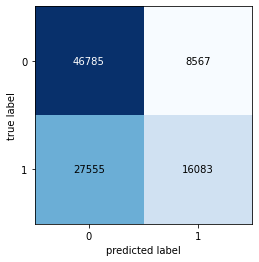

Base desconsiderando contato com outros diagnósticos COVID:


C:\Users\victo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



              precision    recall  f1-score   support

           0       0.63      0.85      0.72     55352
           1       0.65      0.36      0.46     43638

    accuracy                           0.63     98990
   macro avg       0.64      0.60      0.59     98990
weighted avg       0.64      0.63      0.61     98990



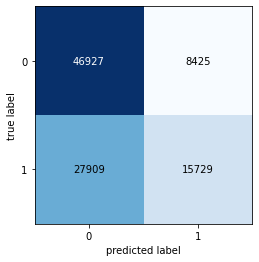

In [32]:
model = LogisticRegression(random_state=random_state, max_iter=100)

splits = [('Base considerando contato com outros diagnósticos COVID',X_train,y_train,X_test,y_test),('Base desconsiderando contato com outros diagnósticos COVID',X_train_alt,y_train_alt,X_test_alt,y_test_alt)]
for name, X_train_split, y_train_split, X_test_split, y_test_split in splits:
    print(name+':')
    
    model.fit(X_train_split, y_train_split)
    y_pred = model.predict(X_test_split)
    print(classification_report(y_test_split, y_pred))
    
    cm = confusion_matrix(y_test_split, y_pred)
    plot_confusion_matrix(conf_mat=cm, fontcolor_threshold=0.8)
    plt.show()
    
    print('='*60)

Desde já é importante destacar o papel do *recall* neste tipo de abordagem: como se trata de doença contagiosa (epidemiológica), devem ser identificados idealmente todos os casos tidos como positivos **(target = 1)**. Por mais que um *recall* alto faça com que casos negativos **(target = 0)** sejam identificados como positivos (falsos positivos), este cenário é mais aceitável do que termos muitos falsos negativos, porque neste último estaríamos permitindo que indivíduos potencialmente com a doença em estágio altamente transmissível circulem livremente sem saberem que estão na verdade positivos. Portanto, a otimização futuramente se dará tendo em vista a maximização do *recall*.

Pode-se observar desde já que em todos os casos testados, a base de treino considerando a coluna de "teve contato com outros positivos para COVID" obteve melhores resultados.

Conforme mencionado anteriormente, há pouquíssima diferença entre usar ou não o *scaling* das features, portanto opta-se por não utilizar nesse caso em específico.

O algoritmo de K-Neighbors requer um grande tempo e esforço computacional para treinar o modelo, por isso testou-se arbitrariamente alguns valores de K vizinhos para avaliar se o modelo é um bom candidato para o *baseline*. Sua métrica de *recall* se sobressaiu com relação a outros. Apesar do algoritmo necessitar de padronização e normalização dos dados, como todas as *features* são 1 ou 0, considerou-se razoável implementá-lo sem scaling.

Os scores considerando o objetivo de identificar quem *não tem* COVID ficaram razoáveis.

Já considerando o objetivo de identificar pacientes positivos para COVID, apesar do score de *precisão* ter sido razoável, o *recall* é muito baixo.

#### Implementação em pipeline

A fim de compararmos as métricas de todos os modelos testados, e agora levando em conta somente o caso que possui todas as features, implementaremos um pipeline para instanciar e treiná-los, além de plotar as curvas ROC-AUC de cada um e um resumo das métricas de avaliação.

In [45]:
def test_models_plot_roc_auc_curve(
        model_list,
        X_train,
        X_test,
        y_train,
        y_test):
    """
        model_list: Lista de modelos a serem testados
                    Formato (List[Dict[model_name|estimator, name|Model]])
        X_train: Dados de treino (features)
        X_test: Dados de teste (features)
        y_train: Dados de treino (alvo)
        y_test: Dados de teste (alvo)
    """

    response = {}
    for mdl in model_list:
        model = mdl.get('estimator')
        model.fit(X_train, y_train)
        y_predict = model.predict(X_test)

        
        fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])

        model_name = mdl.get('model_name')
        accuracy = metrics.accuracy_score(y_test, y_predict)
        auc = metrics.roc_auc_score(y_test, model.predict(X_test))
        precision = metrics.precision_score(y_test, y_predict, average='weighted')
        recall = metrics.recall_score(y_test, y_predict, average='weighted')
        f1_score = metrics.f1_score(y_test, y_predict, average='weighted')
        plt.plot(fpr, tpr, label='%s ROC (AUC = %0.2f)' % (mdl.get('model_name'), auc))

        print(f"Model      : {model_name}")
        print(f"Accuracy   : {accuracy:.4f} ")
        print(f"Precision  : {precision:.4f}")
        print(f"Recall     : {recall:.4f}")
        print(f"F1 - Score : {f1_score:.4f} ")
        print(f"ROC - AUC  : {auc:.4f} ")
        print("======================")

        response[mdl.get('model_name')]  = {
            "accuracy": accuracy,
            "precision": precision,
            "recall": recall,
            "f1_score": f1_score,
            "auc": auc,
        }
        

    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC-AUC curve')
    plt.legend(loc="lower right")
    plt.show()
    return response


In [46]:
list_models = [
  {
      "model_name": "Random Forest",
      "estimator": RandomForestClassifier(random_state=random_state)
  },
  {
      "model_name": "AdaBoost",
      "estimator": AdaBoostClassifier(random_state=random_state)
  },
  {
      "model_name": "KNeighbors",
      "estimator": KNeighborsClassifier(n_neighbors=5)
  },
  {
      "model_name": "LogisticRegression",
      "estimator": LogisticRegression(random_state=random_state)
  }
]

Mais uma vez, vamos treinar o pipeline dos métodos com e sem *scaling* dos dados e comparar os resultados:

#### Com scaling

Model      : Random Forest
Accuracy   : 0.6246 
Precision  : 0.6254
Recall     : 0.6246
F1 - Score : 0.6015 
ROC - AUC  : 0.5971 
Model      : AdaBoost
Accuracy   : 0.6382 
Precision  : 0.6438
Recall     : 0.6382
F1 - Score : 0.6139 
ROC - AUC  : 0.6097 
Model      : KNeighbors
Accuracy   : 0.5839 
Precision  : 0.5802
Recall     : 0.5839
F1 - Score : 0.5810 
ROC - AUC  : 0.5729 
Model      : LogisticRegression
Accuracy   : 0.6350 
Precision  : 0.6394
Recall     : 0.6350
F1 - Score : 0.6110 
ROC - AUC  : 0.6068 


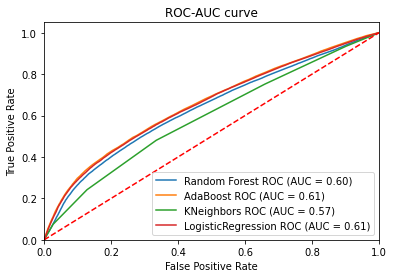

In [47]:
scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

pipeline_response = test_models_plot_roc_auc_curve(
    list_models,
    X_train_std,
    X_test_std,
    y_train,
    y_test
)

#### Sem scaling

Model      : Random Forest
Accuracy   : 0.6247 
Precision  : 0.6256
Recall     : 0.6247
F1 - Score : 0.6016 
ROC - AUC  : 0.5972 
Model      : AdaBoost
Accuracy   : 0.6382 
Precision  : 0.6438
Recall     : 0.6382
F1 - Score : 0.6139 
ROC - AUC  : 0.6097 
Model      : KNeighbors
Accuracy   : 0.5794 
Precision  : 0.5758
Recall     : 0.5794
F1 - Score : 0.5767 
ROC - AUC  : 0.5686 


C:\Users\victo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Model      : LogisticRegression
Accuracy   : 0.6351 
Precision  : 0.6395
Recall     : 0.6351
F1 - Score : 0.6111 
ROC - AUC  : 0.6069 


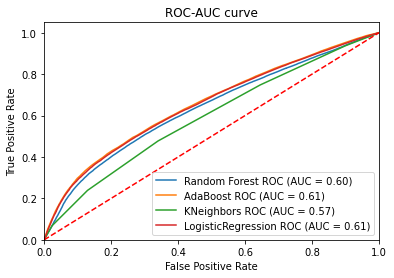

In [48]:
pipeline_response = test_models_plot_roc_auc_curve(
    list_models,
    X_train,
    X_test,
    y_train,
    y_test
)

In [49]:
lista_metricas = list(pipeline_response[list(pipeline_response.keys())[0]].keys())
t = PrettyTable()
t.field_names = ['modelo'] + lista_metricas

for modelo in pipeline_response.keys():
    metricas = list(pipeline_response[modelo].values())
    metricas_fmt = [f"{metrica*100:.2f}" for metrica in metricas]

    t.add_row(
        [modelo] + metricas_fmt
    )
print(t)

+--------------------+----------+-----------+--------+----------+-------+
|       modelo       | accuracy | precision | recall | f1_score |  auc  |
+--------------------+----------+-----------+--------+----------+-------+
|   Random Forest    |  62.47   |   62.56   | 62.47  |  60.16   | 59.72 |
|      AdaBoost      |  63.82   |   64.38   | 63.82  |  61.39   | 60.97 |
|     KNeighbors     |  57.94   |   57.58   | 57.94  |  57.67   | 56.86 |
| LogisticRegression |  63.51   |   63.95   | 63.51  |  61.11   | 60.69 |
+--------------------+----------+-----------+--------+----------+-------+


## Otimização do Modelo <a class="anchor" id="fourth-bullet"></a>

Nesta etapa iremos otimizar os dois modelos *baseline* que apresentaram melhor performance, a princípio, que foram os modelos de  **Adaboost** e **Regressão Logística**.

Para isso, primeiramente escolhemos alguns dos principais hiperparâmetros de cada um e criamos uma lista, variando entre valores que façam sentido para nossa aplicação.

In [50]:
model_adaboost = AdaBoostClassifier(random_state=random_state)
print("Parâmetros do Adaboost:")
pprint(model.get_params())

model_logreg = LogisticRegression(random_state=random_state)
print("Parâmetros da LogisticRegression:")
pprint(model.get_params())

Parâmetros do Adaboost:
{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}
Parâmetros da LogisticRegression:
{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}


In [51]:
n_estimators = [int(x) for x in np.linspace(start=50, stop=300, num=3)]
learning_rate = [1,5,10]

params_grid_adaboost = {
    'n_estimators': n_estimators,
    'learning_rate': learning_rate
}
pprint(params_grid_adaboost)

{'learning_rate': [1, 5, 10], 'n_estimators': [50, 175, 300]}


In [52]:
C = [1, 3, 5]
class_weight = [{ 0:0.2, 1:0.8 }, { 0:0.1, 1:0.9 }, 'balanced', 'auto', None]
solver = ['lbfgs','sag','saga']

params_grid_logreg = {
    'C': C,
    'class_weight': class_weight,
    'solver': solver
}
pprint(params_grid_logreg)

{'C': [1, 3, 5],
 'class_weight': [{0: 0.2, 1: 0.8}, {0: 0.1, 1: 0.9}, 'balanced', 'auto', None],
 'solver': ['lbfgs', 'sag', 'saga']}


Em seguida, iremos utilizar o GridSearchCV e o RandomSearchCV para buscar qual a melhor combinação possível para dados parâmetros e determinar qual o modelo que apresenta melhor performance no final das contas. Em todos os casos optou-se por utilizar 3 *folds* na validação cruzada.

Testou-se a maximização do *recall* e posteriormente do F1, definida pelo parâmetro "scoring", porém isso levou a um valor muito baixo para as demais métricas, portanto optou-se por otimizar a **acurácia**, que é um balanço entre taxas de TP, FP, TN e FN e não prejudica significativamente a precisão nem o *recall*.

## GridSearchCV

#### AdaBoost

In [53]:
grid_search_adaboost = GridSearchCV(
    estimator=model_adaboost,
    param_grid=params_grid_adaboost,
    scoring='accuracy',
    cv=3,
    verbose=2,
    n_jobs=-1
)

In [54]:
%%time 
grid_search_adaboost.fit(X_train, y_train)

print(grid_search_adaboost.cv_results_['mean_test_score'].mean())

Fitting 3 folds for each of 9 candidates, totalling 27 fits
0.5192921695959898
Wall time: 7min 36s


In [55]:
grid_search_adaboost.best_params_

{'learning_rate': 1, 'n_estimators': 175}

In [56]:
cvs = pd.DataFrame(grid_search_adaboost.cv_results_)

cvs.T

,0,1,2,3,4,5,6,7,8
mean_fit_time,28.136119,97.621639,165.672184,28.010851,97.634672,165.825065,28.817186,99.79779,122.067657
std_fit_time,0.446186,0.979778,0.874787,0.687277,0.732783,2.437344,0.108125,2.643566,20.655743
mean_score_time,3.759798,12.960221,22.399293,3.864215,13.503656,19.7984,4.361252,12.941791,10.366655
std_score_time,0.152179,0.365824,0.584454,0.141003,0.291549,4.208666,0.308641,0.452954,1.91331
param_learning_rate,1,1,1,5,5,5,10,10,10
param_n_estimators,50,175,300,50,175,300,50,175,300
params,"{'learning_rate': 1, 'n_estimators': 50}","{'learning_rate': 1, 'n_estimators': 175}","{'learning_rate': 1, 'n_estimators': 300}","{'learning_rate': 5, 'n_estimators': 50}","{'learning_rate': 5, 'n_estimators': 175}","{'learning_rate': 5, 'n_estimators': 300}","{'learning_rate': 10, 'n_estimators': 50}","{'learning_rate': 10, 'n_estimators': 175}","{'learning_rate': 10, 'n_estimators': 300}"
split0_test_score,0.634575,0.635166,0.634999,0.383048,0.616952,0.383048,0.383048,0.616952,0.383048
split1_test_score,0.635628,0.635878,0.635931,0.382821,0.617179,0.382821,0.382821,0.617179,0.382821
split2_test_score,0.635992,0.636007,0.635969,0.384503,0.615497,0.384503,0.384503,0.615497,0.384503


In [57]:
cvs.describe().T

,count,mean,std,min,25%,50%,75%,max
mean_fit_time,9.0,92.620351,54.849526,28.010851,28.817186,97.634672,122.067657,165.825065
std_fit_time,9.0,3.285065,6.570856,0.108125,0.687277,0.874787,2.437344,20.655743
mean_score_time,9.0,11.550587,6.766857,3.759798,4.361252,12.941791,13.503656,22.399293
std_score_time,9.0,0.935398,1.341771,0.141003,0.291549,0.365824,0.584454,4.208666
split0_test_score,9.0,0.518982,0.129146,0.383048,0.383048,0.616952,0.634575,0.635166
split1_test_score,9.0,0.519231,0.129611,0.382821,0.382821,0.617179,0.635628,0.635931
split2_test_score,9.0,0.519664,0.128470,0.384503,0.384503,0.615497,0.635969,0.636007
mean_test_score,9.0,0.519292,0.129075,0.383457,0.383457,0.616543,0.635398,0.635684
std_test_score,9.0,0.000654,0.000148,0.000370,0.000601,0.000745,0.000745,0.000745
rank_test_score,9.0,4.222222,1.922094,1.000000,3.000000,4.000000,6.000000,6.000000


In [58]:
model_gs_adaboost = AdaBoostClassifier(**grid_search_adaboost.best_params_)

model_gs_adaboost.fit(X_train, y_train)
y_pred_gs_adaboost = model_gs_adaboost.predict(X_test)

              precision    recall  f1-score   support

           0       0.63      0.85      0.72     55352
           1       0.66      0.37      0.47     43638

    accuracy                           0.64     98990
   macro avg       0.65      0.61      0.60     98990
weighted avg       0.64      0.64      0.61     98990



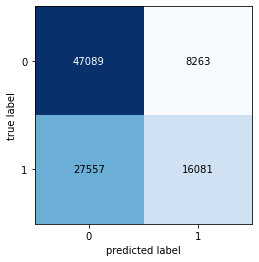

In [59]:
print(classification_report(y_test, y_pred_gs_adaboost))

cm = confusion_matrix(y_test, y_pred_gs_adaboost)
plot_confusion_matrix(conf_mat=cm, fontcolor_threshold=0.8)
plt.show()

#### LogisticRegression

In [60]:
grid_search_logreg = GridSearchCV(
    estimator=model_logreg,
    param_grid=params_grid_logreg,
    scoring='accuracy',
    cv=3,
    verbose=2,
    n_jobs=-1
)

In [61]:
%%time 
grid_search_logreg.fit(X_train, y_train)

print(grid_search_logreg.cv_results_['mean_test_score'].mean())

Fitting 3 folds for each of 45 candidates, totalling 135 fits
0.5540529270500631
Wall time: 6min 52s


C:\Users\victo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [62]:
grid_search_logreg.best_params_

{'C': 1, 'class_weight': 'auto', 'solver': 'lbfgs'}

In [63]:
cvs = pd.DataFrame(grid_search_logreg.cv_results_)

cvs.T

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
mean_fit_time,8.622758,33.825203,35.393749,6.931648,29.913413,32.195661,6.780152,28.189601,33.02323,6.429891,...,32.631592,5.803149,28.971739,37.075277,7.433244,31.438038,34.366396,6.336783,26.79858,30.54585
std_fit_time,0.309267,0.47094,1.312841,0.425711,0.396067,0.325156,0.412273,0.424814,0.752462,0.275431,...,0.240996,1.489899,1.010278,0.456918,0.668836,0.757455,1.080451,0.199476,0.519442,0.919916
mean_score_time,0.060485,0.063451,0.058296,0.056011,0.04989,0.072477,0.053981,0.061708,0.053931,0.057148,...,0.052814,0.056089,0.07316,0.061488,0.076665,0.057288,0.051972,0.061025,0.048839,0.033757
std_score_time,0.006568,0.006592,0.007779,0.005158,0.004453,0.016318,0.005027,0.006105,0.006962,0.004133,...,0.003483,0.006873,0.016099,0.014486,0.021092,0.012032,0.009357,0.009809,0.000967,0.00273
param_C,1,1,1,1,1,1,1,1,1,1,...,5,5,5,5,5,5,5,5,5,5
param_class_weight,"{0: 0.2, 1: 0.8}","{0: 0.2, 1: 0.8}","{0: 0.2, 1: 0.8}","{0: 0.1, 1: 0.9}","{0: 0.1, 1: 0.9}","{0: 0.1, 1: 0.9}",balanced,balanced,balanced,auto,...,"{0: 0.1, 1: 0.9}",balanced,balanced,balanced,auto,auto,auto,None,None,None
param_solver,lbfgs,sag,saga,lbfgs,sag,saga,lbfgs,sag,saga,lbfgs,...,saga,lbfgs,sag,saga,lbfgs,sag,saga,lbfgs,sag,saga
params,"{'C': 1, 'class_weight': {0: 0.2, 1: 0.8}, 'so...","{'C': 1, 'class_weight': {0: 0.2, 1: 0.8}, 'so...","{'C': 1, 'class_weight': {0: 0.2, 1: 0.8}, 'so...","{'C': 1, 'class_weight': {0: 0.1, 1: 0.9}, 'so...","{'C': 1, 'class_weight': {0: 0.1, 1: 0.9}, 'so...","{'C': 1, 'class_weight': {0: 0.1, 1: 0.9}, 'so...","{'C': 1, 'class_weight': 'balanced', 'solver':...","{'C': 1, 'class_weight': 'balanced', 'solver':...","{'C': 1, 'class_weight': 'balanced', 'solver':...","{'C': 1, 'class_weight': 'auto', 'solver': 'lb...",...,"{'C': 5, 'class_weight': {0: 0.1, 1: 0.9}, 'so...","{'C': 5, 'class_weight': 'balanced', 'solver':...","{'C': 5, 'class_weight': 'balanced', 'solver':...","{'C': 5, 'class_weight': 'balanced', 'solver':...","{'C': 5, 'class_weight': 'auto', 'solver': 'lb...","{'C': 5, 'class_weight': 'auto', 'solver': 'sag'}","{'C': 5, 'class_weight': 'auto', 'solver': 'sa...","{'C': 5, 'class_weight': None, 'solver': 'lbfgs'}","{'C': 5, 'class_weight': None, 'solver': 'sag'}","{'C': 5, 'class_weight': None, 'solver': 'saga'}"
split0_test_score,0.441198,0.441244,0.441221,0.440774,0.440774,0.440782,0.621763,0.621846,0.621846,0.632431,...,0.440782,0.621483,0.621846,0.621846,0.632309,0.632309,0.632325,0.632309,0.632309,0.632325
split1_test_score,0.441456,0.441403,0.441373,0.44088,0.440873,0.440857,0.623528,0.623468,0.62346,0.63265,...,0.440857,0.623271,0.623475,0.62346,0.632196,0.632393,0.6324,0.632196,0.632393,0.6324


In [64]:
cvs.describe().T

,count,mean,std,min,25%,50%,75%,max
mean_fit_time,45.0,23.367719,12.030922,5.803149,6.931648,29.913413,32.631592,37.075277
std_fit_time,45.0,0.483793,0.330868,0.004885,0.240996,0.425711,0.668836,1.489899
mean_score_time,45.0,0.057564,0.008058,0.033757,0.052000,0.057148,0.061708,0.076665
std_score_time,45.0,0.007918,0.004723,0.000967,0.004453,0.006592,0.011344,0.021092
split0_test_score,45.0,0.553694,0.093130,0.440766,0.441221,0.621846,0.632325,0.632431
split1_test_score,45.0,0.554094,0.093342,0.440857,0.441373,0.623460,0.632400,0.632650
split2_test_score,45.0,0.554371,0.093693,0.440842,0.441100,0.623748,0.633060,0.633196
mean_test_score,45.0,0.554053,0.093388,0.440827,0.441239,0.623018,0.632590,0.632759
std_test_score,45.0,0.000335,0.000303,0.000033,0.000103,0.000324,0.000341,0.001039
rank_test_score,45.0,22.288889,13.424236,1.000000,11.000000,23.000000,33.000000,44.000000


In [65]:
model_gs_logreg = LogisticRegression(**grid_search_logreg.best_params_)

model_gs_logreg.fit(X_train, y_train)
y_pred_gs_logreg = model_gs_logreg.predict(X_test)

C:\Users\victo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



              precision    recall  f1-score   support

           0       0.63      0.85      0.72     55352
           1       0.65      0.37      0.47     43638

    accuracy                           0.64     98990
   macro avg       0.64      0.61      0.60     98990
weighted avg       0.64      0.64      0.61     98990



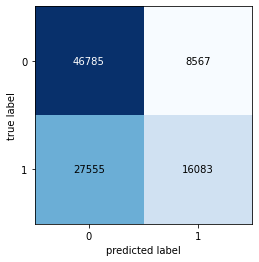

In [66]:
print(classification_report(y_test, y_pred_gs_logreg))

cm = confusion_matrix(y_test, y_pred_gs_logreg)
plot_confusion_matrix(conf_mat=cm, fontcolor_threshold=0.8)
plt.show()

## RandomSearchCV

#### AdaBoost

In [67]:
random_search_adaboost = RandomizedSearchCV(
    estimator=model_adaboost,
    param_distributions=params_grid_adaboost,
    n_iter=100,
    scoring='accuracy',
    cv=3,
    verbose=2,
    n_jobs=-1
)

In [68]:
%%time

random_search_adaboost.fit(X_train, y_train)
print(random_search_adaboost.cv_results_['mean_test_score'].mean())

C:\Users\victo\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning:

The total space of parameters 9 is smaller than n_iter=100. Running 9 iterations. For exhaustive searches, use GridSearchCV.



Fitting 3 folds for each of 9 candidates, totalling 27 fits
0.5192921695959898
Wall time: 7min 29s


In [69]:
random_search_adaboost.best_params_

{'n_estimators': 175, 'learning_rate': 1}

In [70]:
model_rs_adaboost = AdaBoostClassifier(**random_search_adaboost.best_params_)

model_rs_adaboost.fit(X_train, y_train)
y_pred_rs_adaboost = model_rs_adaboost.predict(X_test)

              precision    recall  f1-score   support

           0       0.63      0.85      0.72     55352
           1       0.66      0.37      0.47     43638

    accuracy                           0.64     98990
   macro avg       0.65      0.61      0.60     98990
weighted avg       0.64      0.64      0.61     98990



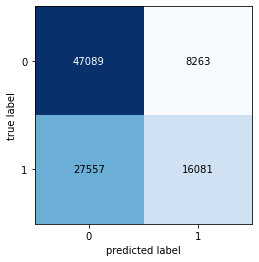

In [71]:
print(classification_report(y_test, y_pred_rs_adaboost))

cm = confusion_matrix(y_test, y_pred_rs_adaboost)
plot_confusion_matrix(conf_mat=cm, fontcolor_threshold=0.8)
plt.show()

#### LogisticRegression

In [72]:
random_search_logreg = RandomizedSearchCV(
    estimator=model_logreg,
    param_distributions=params_grid_logreg,
    n_iter=100,
    scoring='accuracy',
    cv=3,
    verbose=2,
    n_jobs=-1
)

In [73]:
%%time

random_search_logreg.fit(X_train, y_train)
print(random_search_logreg.cv_results_['mean_test_score'].mean())

C:\Users\victo\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning:

The total space of parameters 45 is smaller than n_iter=100. Running 45 iterations. For exhaustive searches, use GridSearchCV.



Fitting 3 folds for each of 45 candidates, totalling 135 fits
0.5540529270500631
Wall time: 6min 43s


C:\Users\victo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [74]:
random_search_logreg.best_params_

{'solver': 'lbfgs', 'class_weight': 'auto', 'C': 1}

In [75]:
model_rs_logreg = LogisticRegression(**random_search_logreg.best_params_)

model_rs_logreg.fit(X_train, y_train)
y_pred_rs_logreg = model_rs_logreg.predict(X_test)

C:\Users\victo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



              precision    recall  f1-score   support

           0       0.63      0.85      0.72     55352
           1       0.65      0.37      0.47     43638

    accuracy                           0.64     98990
   macro avg       0.64      0.61      0.60     98990
weighted avg       0.64      0.64      0.61     98990



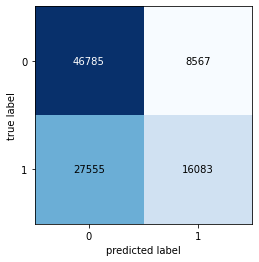

In [76]:
print(classification_report(y_test, y_pred_rs_logreg))

cm = confusion_matrix(y_test, y_pred_rs_logreg)
plot_confusion_matrix(conf_mat=cm, fontcolor_threshold=0.8)
plt.show()

Comparação entre os resultados de Grid e Random Search para ambos modelos:

In [77]:
print("Comparação das acurácias (AdaBoost): ")
print('-> Acurácia sem Otimização:         ', np.round(accuracy_score(y_test, y_pred), 3))
print('-> Acurácia com GridSearchCV:       ', np.round(accuracy_score(y_test, y_pred_gs_adaboost), 3))
print('-> Acurácia com RandomizedSearchCV: ', np.round(accuracy_score(y_test, y_pred_rs_adaboost), 3))

print("Comparação das acurácias (LogReg): ")
print('-> Acurácia sem Otimização:         ', np.round(accuracy_score(y_test, y_pred), 3))
print('-> Acurácia com GridSearchCV:       ', np.round(accuracy_score(y_test, y_pred_gs_logreg), 3))
print('-> Acurácia com RandomizedSearchCV: ', np.round(accuracy_score(y_test, y_pred_rs_logreg), 3))

Comparação das acurácias (AdaBoost): 
-> Acurácia sem Otimização:          0.633
-> Acurácia com GridSearchCV:        0.638
-> Acurácia com RandomizedSearchCV:  0.638
Comparação das acurácias (LogReg): 
-> Acurácia sem Otimização:          0.633
-> Acurácia com GridSearchCV:        0.635
-> Acurácia com RandomizedSearchCV:  0.635


Caso necessário maximizar o *recall* independentemente do prejuízo para as demais métricas, ele atinge taxas de até 69%, a custo de reduzir a acurácia geral, conforme abaixo:

In [78]:
random_search_adaboost = RandomizedSearchCV(
    estimator=model_adaboost,
    param_distributions=params_grid_adaboost,
    n_iter=100,
    scoring='recall',
    cv=3,
    verbose=2,
    n_jobs=-1
)

In [79]:
%%time

random_search_adaboost.fit(X_train, y_train)
print(random_search_adaboost.cv_results_['mean_test_score'].mean())

Fitting 3 folds for each of 9 candidates, totalling 27 fits


C:\Users\victo\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning:

The total space of parameters 9 is smaller than n_iter=100. Running 9 iterations. For exhaustive searches, use GridSearchCV.



0.4993389472687422
Wall time: 6min 57s


In [80]:
random_search_adaboost.best_params_

{'n_estimators': 50, 'learning_rate': 5}

In [81]:
model_rs_adaboost = AdaBoostClassifier(**random_search_adaboost.best_params_)

model_rs_adaboost.fit(X_train, y_train)
y_pred_rs_adaboost = model_rs_adaboost.predict(X_test)

              precision    recall  f1-score   support

           0       0.36      0.14      0.20     55352
           1       0.39      0.69      0.50     43638

    accuracy                           0.38     98990
   macro avg       0.37      0.41      0.35     98990
weighted avg       0.37      0.38      0.33     98990



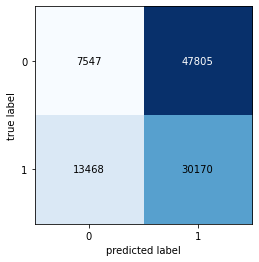

In [82]:
print(classification_report(y_test, y_pred_rs_adaboost))

cm = confusion_matrix(y_test, y_pred_rs_adaboost)
plot_confusion_matrix(conf_mat=cm, fontcolor_threshold=0.8)
plt.show()

## Executando a base de testes

In [83]:
covid_teste = pd.read_csv('COVID_subm.csv', index_col=0)
covid_teste.head()

,sex,patient_type,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,icu
373402,1,1,NaN,0.0,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,NaN
181022,0,1,NaN,0.0,26,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
317841,0,1,NaN,0.0,57,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
272745,1,1,NaN,0.0,40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
153280,0,0,0.0,0.0,55,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0


In [84]:
model = AdaBoostClassifier(n_estimators=175, learning_rate=1, random_state=random_state)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

              precision    recall  f1-score   support

           0       0.63      0.85      0.72     55352
           1       0.66      0.37      0.47     43638

    accuracy                           0.64     98990
   macro avg       0.65      0.61      0.60     98990
weighted avg       0.64      0.64      0.61     98990



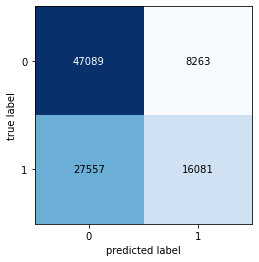

In [85]:
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat=cm, fontcolor_threshold=0.8)
plt.show()

## Conclusões <a class="anchor" id="fifth-bullet"></a>

Após as devidas análises, podemos verificar que o melhor modelo, que conseguiu otimizar a acurácia (63,8%), sem prejudicar a precisão, foi o AdaBoost utilizando 175 estimadores e taxa de aprendizado igual a 1. Para a classe 0 os resultados são satisfatórios, porém para a classe 1 o *recall* permance baixo.

Se desejado maximizar o *recall*, por sua vez, utilizamos o AdaBoost com 50 estimadores e taxa de aprendizado igual a 5.

O valor do recall nos modelos *baseline* e no modelo com acurácia otimizada se mostrou muito baixo devido a diversos fatores, mas principalmente devido à maioria das features não serem sintomas de COVID propriamente ditos, e sim:
* Fatores de risco
* ou doenças crônicas
* ou medidas que foram tomadas para prevenção e tratamento de casos suspeitos, muitas vezes sem o diagnóstico comprovado ou tomadas "ao acaso", fator esse que prejudica bastante a performance do modelo

*Exemplo: muitos registros que apresentaram quadros com diversas combinações de fatores de risco foram internados mas não tinham COVID.*

Demais estratégicas para se otimizar ainda mais os modelos e nossos resultados seriam:
* Adicionar mais features significativas (ex.: tipos de sintomas) e eliminar aquelas que pouco contribuem para determinar se o paciente possui COVID ou não
* Obter alguma certificação de que as internações são feitas em casos positivos e que os diagnósticos estão corretos (teste para COVID está sujeito a uma taxa de FN e FP)
* Utilizar outras ferramentas para otimização de modelos (ex.: Optuna)
* Testar demais algoritmos de classificação (Naive-Bayes, SVM)

# [Retornar ao início](#imports)